# K-Nearest Neighbors

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Prepare your data

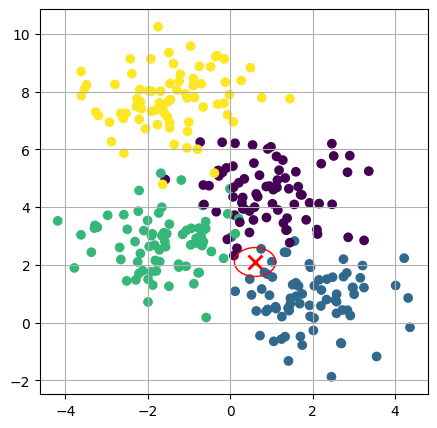

In [2]:
#let's consider the following 2D data with 4 classes
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

xfit = np.linspace(-1, 3.5)

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

#where should this value be classified as?
ax.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

#let's say roughly 5 neighbors
circle = plt.Circle((0.6, 2.1), 0.5, color='red', fill=False)
ax.add_artist(circle)

In [3]:
#do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Function for pairwise distance

In [4]:
def find_distance(X_train, X_test):
    dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
    sq_dist = dist ** 2
    
    summed_dist = sq_dist.sum(axis=2)
    sq_dist = np.sqrt(summed_dist)
    
    return sq_dist

In [5]:
train_ex = np.array([[1, 2], [2, 3], [2, 3]])
test_ex  = np.array([[3, 4], [1, 2]])

d = find_distance(train_ex, test_ex)
print(d)

[[2.82842712 1.41421356 1.41421356]
 [0.         1.41421356 1.41421356]]


In [6]:
neighbors_ix = np.argsort(d)[:, 0:2]

In [7]:
neighbors_ix

array([[1, 2],
       [0, 1]])

## 3. Argsort the pairwise distance matrix

In [8]:
def find_neighbors(X_train, X_test, k=3):
    dist = find_distance(X_train, X_test)
    neighbors_ix = np.argsort(dist)[:, 0:k]
    return neighbors_ix

## 4. Get the majority class

In [9]:
def get_most_common(y):
    return np.bincount(y).argmax()

In [10]:
a = np.array([0, 1, 1, 3, 2, 3, 3, 7, 2, 2, 2, 2])

In [11]:
count = np.bincount(a, minlength=10)
count

array([1, 2, 5, 3, 0, 0, 0, 1, 0, 0])

In [12]:
most_common = count.argmax()
most_common

2

In [16]:
argsort = count.argsort()
argsort[:-2]

array([4, 5, 6, 8, 9, 0, 7, 1])

## 5. Let's write a wrapper function that links all function and use it

In [17]:
def predict(X_train, X_test, y_train, k=3):
    neighbors_ix = find_neighbors(X_train, X_test, k)
    pred         = np.zeros(X_test.shape[0])
    for ix, y in enumerate(y_train[neighbors_ix]):
        pred[ix] = get_most_common(y)
    return pred

In [18]:
yhat = predict(X_train, X_test, y_train, k=3)

In [19]:
yhat

array([3., 3., 2., 1., 3., 3., 1., 1., 1., 2., 1., 0., 0., 2., 3., 3., 3.,
       2., 2., 0., 1., 0., 2., 2., 3., 1., 0., 0., 0., 1., 3., 2., 0., 3.,
       0., 2., 1., 3., 0., 2., 1., 2., 1., 2., 0., 2., 2., 0., 0., 0., 3.,
       0., 0., 2., 1., 3., 2., 1., 3., 2., 3., 1., 2., 0., 2., 0., 0., 1.,
       3., 2., 1., 2., 3., 2., 0., 2., 0., 2., 1., 1., 2., 1., 1., 0., 1.,
       1., 2., 1., 3., 2.])

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.83      0.95      0.88        20
           2       0.96      0.87      0.91        30
           3       0.94      1.00      0.97        17

    accuracy                           0.89        90
   macro avg       0.89      0.90      0.89        90
weighted avg       0.89      0.89      0.89        90

